In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [25]:
#calculate the basic descriptive statistics
print("MEAN:\n\n",df.mean(numeric_only=True))
print("\nMEDIAN:\n\n",df.median(numeric_only=True))
print("\nMODE:\n\n",df.mode().iloc[0])
print("\nSTANDARD DEVIATION:\n\n",df.std(numeric_only=True))
print("\nVARIANCE:\n\n",df.var(numeric_only=True))


#additional descriptive statistics
print("\nRANGE:\n\n",df.max(numeric_only=True)-df.min(numeric_only=True))
print("\nSKEWNESS:\n\n",df.skew(numeric_only=True))
print("\nKURTOSIS:\n\n",df.kurt(numeric_only=True))

MEAN:

 Person ID                   187.500000
Age                          42.184492
Sleep Duration                7.132086
Quality of Sleep              7.312834
Physical Activity Level      59.171123
Stress Level                  5.385027
Heart Rate                   70.165775
Daily Steps                6816.844920
dtype: float64

MEDIAN:

 Person ID                   187.5
Age                          43.0
Sleep Duration                7.2
Quality of Sleep              7.0
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   70.0
Daily Steps                7000.0
dtype: float64

MODE:

 Person ID                            1
Gender                            Male
Age                               43.0
Occupation                       Nurse
Sleep Duration                     7.2
Quality of Sleep                   8.0
Physical Activity Level           60.0
Stress Level                       3.0
BMI Category                    Normal
Blood P

In [34]:
from scipy import stats

In [33]:

#example data:Sleep Duration
Sleep_Duration_values=df['Sleep Duration']
#population mean
population_mean = 1.50
#perform one sample test
t_stat,p_value = stats.ttest_1samp(Sleep_Duration_values,population_mean)

print(f"T-static:{t_stat}")
print(f"p-vales:{p_value}")

T-static:136.89238938347367
p-vales:6e-321


In [23]:
import numpy as np
from scipy import stats

In [32]:
#Sample mean and standard error for Sleep_Duration
sample_mean=np.mean(Sleep_Duration_values)
standard_error=stats.sem(Sleep_Duration_values)
# Compute 95% confidence interval for Sleep_Duration
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)
print(f"95% Confidence Interval for Sleep_Duration: {confidence_interval}")


95% Confidence Interval for Sleep_Duration: (7.051447880263927, 7.212723242730723)


In [31]:
import statsmodels.api as sm

In [30]:
# Define independent variable
X = sm.add_constant(df['Sleep Duration'])
#define dependent variable
y = df['Quality of Sleep']
#fit linear regression model
model = sm.OLS(y, X).fit()
#print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):          2.17e-124
Time:                        12:38:28   Log-Likelihood:                -314.22
No. Observations:                 374   AIC:                             632.4
Df Residuals:                     372   BIC:                             640.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1634      0.262     -8.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

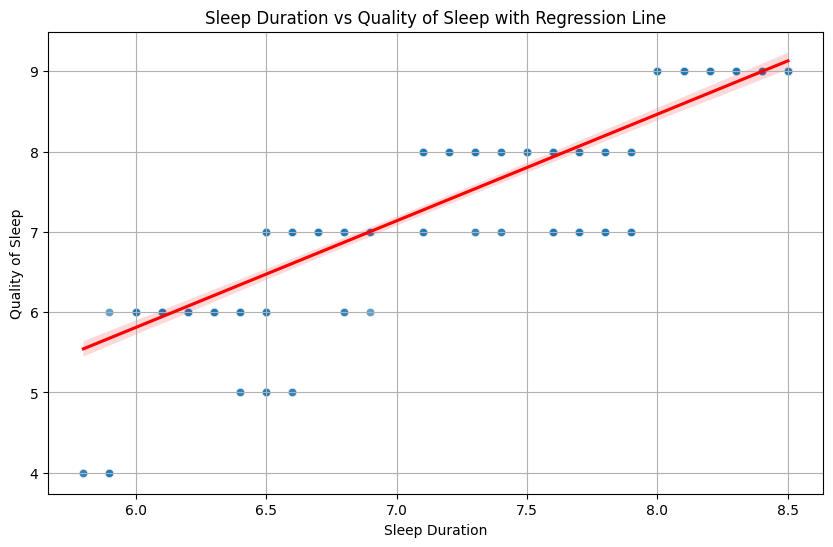

In [29]:
# Plot data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df, alpha=0.7)
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=df, scatter=False, color='red')

# Add labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Duration vs Quality of Sleep with Regression Line')

# Show plot
plt.grid(True)
plt.show()

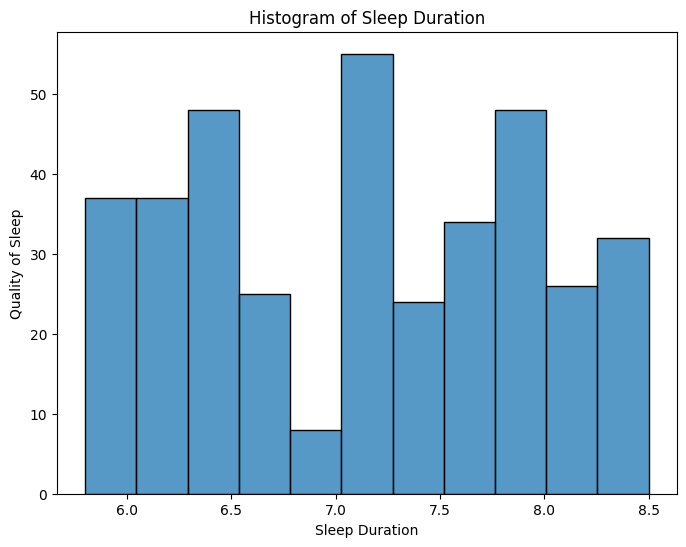

In [28]:
# Histogram of sleep Duration
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], bins=11)
plt.title('Histogram of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()